*Laboratorio di Simulazione Numerica- Cecilia Almagioni*

# Esercitazione 5


In questa esercitazione ho usato l'algoritmo di Metropolis per campionare punti tridimensionali distribuiti nello spazio cartesiano secondo la distribuzione di probabilità della funzione d'onda dell'atomo di idrogeno, sia per il ground state ($|\Psi_{1,0,0}(x,y,z)|^2$) che per uno dei tre stati eccitati *2p* ($|\Psi_{2,1,0}(x,y,z)|^2$). Le densità di probabilità sono, rispettivamente:

$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
\
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$

Con le posizioni campionate ho calcolato i valori di aspettazione della posizione radiale che la teria prevede essere:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$

L'algoritmo di Metropolis richiede di scegliere una probabilità di transizione $T(\vec{x}|\vec{y})$. Per questa esercitazione ho utilizzato sia una transizione di probabilità uniforme che gaussiana.



**Implementazione Algoritmo di Metropolis**

- Prendo la posizione attuale $\vec{r}[i]$;
- Genero una nuova posizione  $\vec{x}$ con il mio generatore della classe `Random`, con distribuzione di probabilità $T(\vec{x}|\vec{r})$ uniforme oppure gaussiana, centrato in $\vec{r}[i]$;
- accetto la mossa con probabilità $\alpha=A(\vec{x}|\vec{r})=min \left[1, \frac{p(x)}{r}\right]$ dove $p(\cdot)=|\psi(\cdot, t)|^2$ (genero un numero casuale $r$ e lo confronto con $\alpha$)
 
A questo scopo ho implementato le seguenti funzioni:
- `Psi1` per il calcolo del modulo quadro della funzione radiale di ground state $|\Psi_{1,0,0}(r,\theta,\phi)|^2$;
- `Psi2` per il calcolo del modulo quadro della funzione radiale di stato eccitato $|\Psi_{2,1,0}(r,\theta,\phi)|^2$;
- `A1` per il calcolo della probabilità della mossa Metropolis con $p=|\Psi_{1,0,0}|^2$;
- `A2` per il calcolo della probabilità della mossa Metropolis con $p=|\Psi_{2,1,0}|^2$;
- `CarToPol` per passare dalle coordinate cartesiane a quelle polari;

Un aspetto importante è stato quello di calibrare l'ampiezza (step) del passo Metropolis (cioè la larghezza della $T(\vec{x}|\vec{r})$: `Random(x0-step/2, x0+step/2)` e `Gauss(x0, step)`) in modo tale da avere un *acceptance  rate* del 50% circa.

Come punto di partenza per l'algoritmo Metropolis ho scelto dei punti abbastanza vicini al valore di aspettazione. Tuttavia, partendo lontano dall'origine all'inizio della simulazione Metropolis, si osserva come in pochi passi la posizione campionata si dirige verso la zona ad alta densità di probabilità, come si può vedere dai grafici 3D sotto riportati.


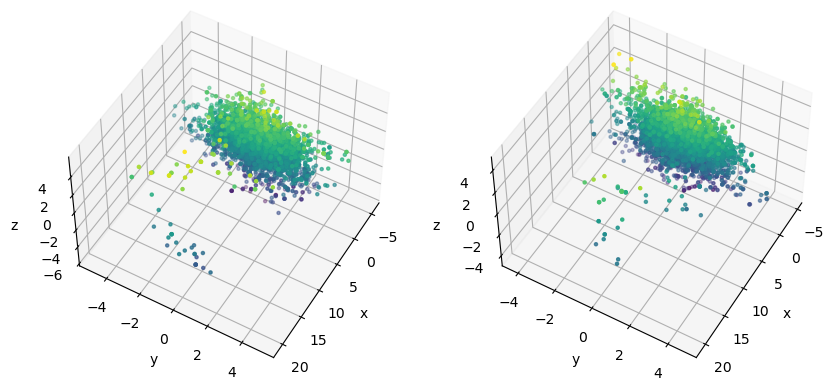

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


X_f, Y_f, Z_f=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es05/psi1FAR.txt", unpack=True)
XG_f, YG_f, ZG_f=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es05/psi1GFAR.txt", unpack=True)


fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_f, Y_f, Z_f, c=Z_f, marker='.')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(50, 30)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(XG_f, YG_f, ZG_f, c=ZG_f, marker='.')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.view_init(50, 30)

plt.show()

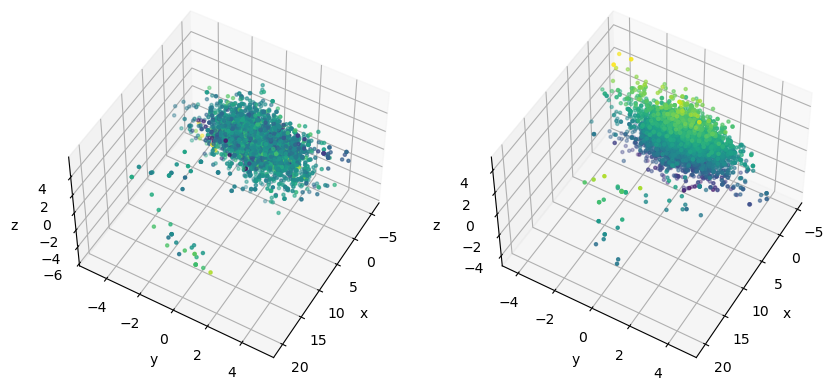

In [19]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


X2_f, Y2_f, Z2_f=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es05/psi2FAR.txt", unpack=True)
X2G_f, Y2G_f, Z2G_f=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es05/psi2GFAR.txt", unpack=True)


fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_f, Y_f, Z_f, c=ZG_f, marker='.')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(50, 30)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(XG_f, YG_f, ZG_f, c=ZG_f, marker='.')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.view_init(50, 30)

plt.show()

**Equilibrazione**

Per prima cosa ho equilibrato il sistema per evitare che le prime posizioni casuali, dunque poco probabili, alterino il calcolo del valore di aspettazione.
Per l'equilibrazione ho eseguito $1000$ passi Metropolis prima di eseguire la simulazione vera e propria

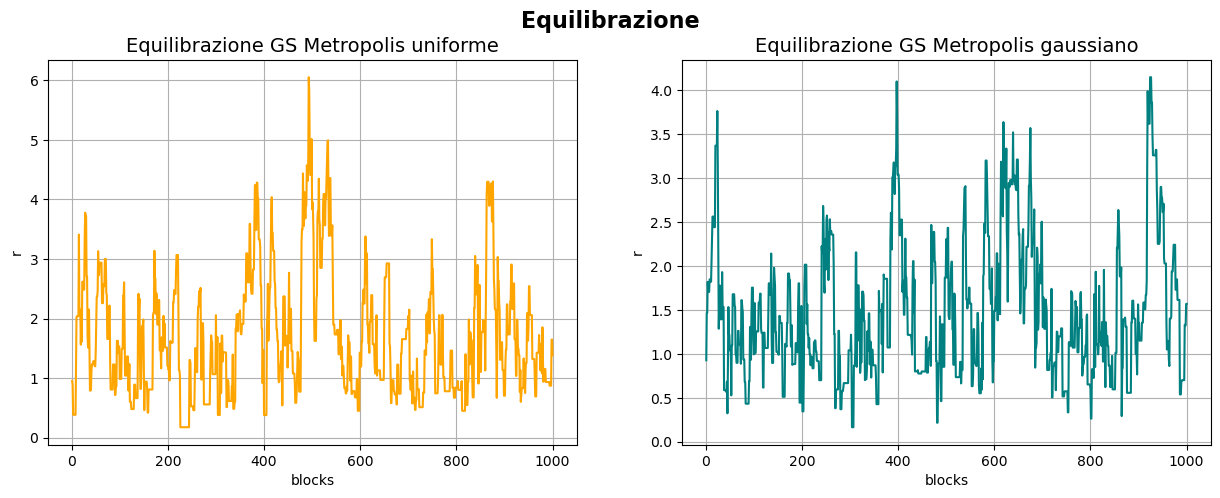

In [20]:
import matplotlib.pyplot as plt
import numpy as np


x, y = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es05/eq1.txt", unpack=True)

z, w = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es05/eq1G.txt", unpack=True)

plt.figure(figsize=(15,5))
plt.suptitle('Equilibrazione',fontweight='bold',fontsize=16)

plt.subplot(121)
plt.plot(x,y, color = "orange")
plt.title('Equilibrazione GS Metropolis uniforme',fontsize=14)
plt.xlabel('blocks')
plt.ylabel('r')
plt.grid(True)

plt.subplot(122)
plt.plot(z,w, color = "teal")
plt.title('Equilibrazione GS Metropolis gaussiano',fontsize=14)
plt.xlabel('blocks')
plt.ylabel('r')
plt.grid(True)

plt.show()

### Esercizio 5.1

Dopo aver equilibrato, ho calcolato il valor medio del raggio del ground state: ho generato $M=10^6$ posizioni 3D campionate con $|\Psi_{1,0,0}(x,y,z)|^2$ e probabilità di transizione uniforme e gaussiana e ho ottenuto il valore di aspettazione con data blocking. Dai grafici sopra ho osservato come per $1000$ passi MC i dati fossero ampiamente scorrelati fra di loro, dunque per il data blocking ho deciso di scegliere $100$ blocchi da $1000$ step ciascuno.


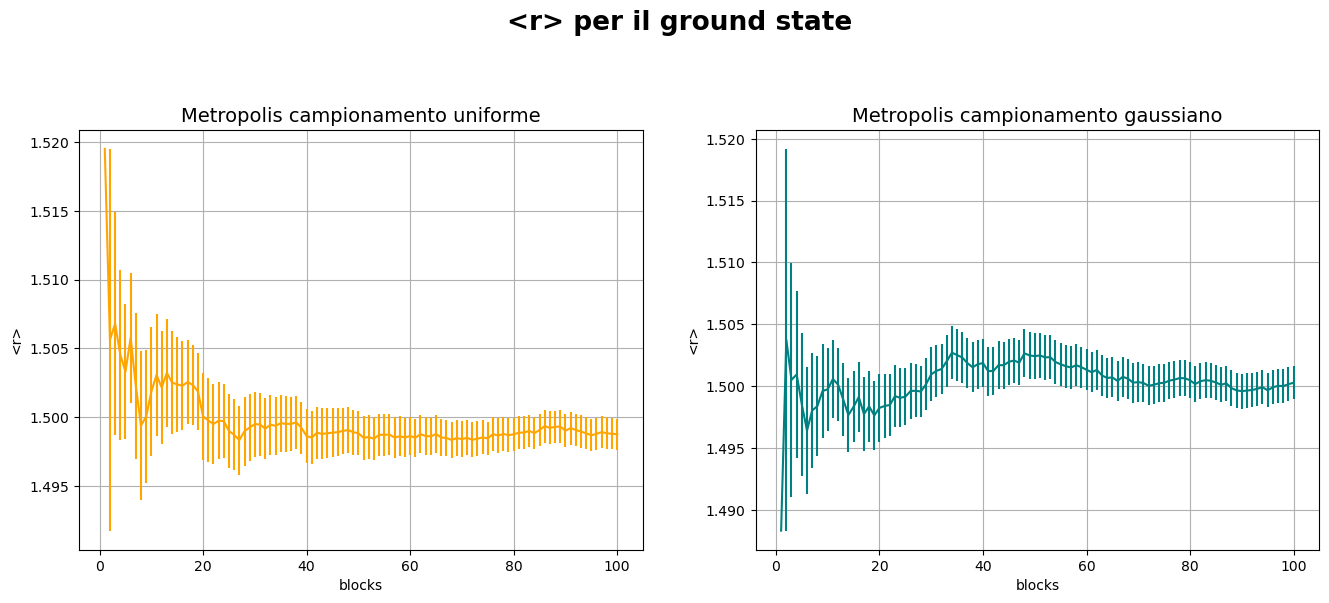

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# dati del primo grafico
x, y, err = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es05/r1.txt", unpack=True)

# dati del secondo grafico
xG, yG, errG = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es05/r1G.txt", unpack=True)


#plotting
plt.figure(figsize=(16,12))
plt.suptitle('<r> per il ground state',fontweight='bold',fontsize=19)

plt.subplot(221)
plt.errorbar(x,y,err,label='ground state', color='orange')
plt.title('Metropolis campionamento uniforme',fontsize=14)
plt.xlabel('blocks')
plt.ylabel('<r>')
plt.grid(True)
#plt.legend()

plt.subplot(222)
plt.errorbar(xG,yG,errG,label='ground state', color='teal')
plt.title('Metropolis campionamento gaussiano',fontsize=14)
plt.xlabel('blocks')
plt.ylabel('<r>')
plt.grid(True)
#plt.legend()


# visualizzazione dei due subplot
plt.show()

Le due probabilità di transizione forniscono risultati analoghi e compatibili tra di loro e con il valore atteso dalla teoria.
\
Riporto qui sotto anche il grafico 3D delle posizioni campionate con l'algoritmo di Metropolis.

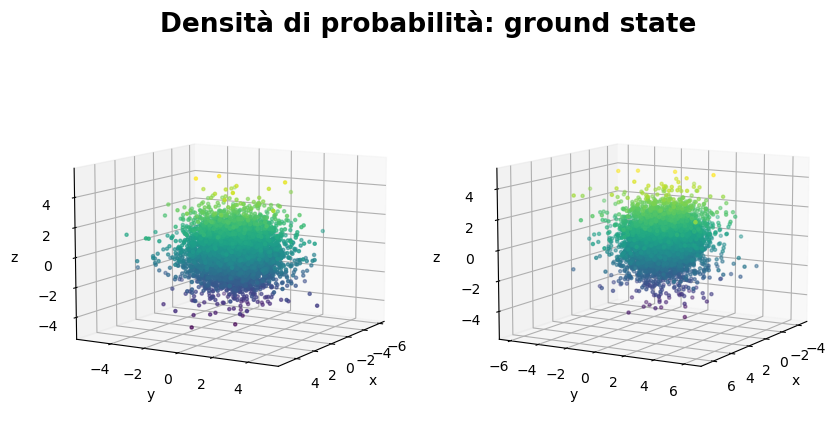

In [10]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


X, Y, Z=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es05/psi1.txt", unpack=True)
XG, YG, ZG=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es05/psi1G.txt", unpack=True)


fig = plt.figure(figsize=(10,5))
plt.suptitle('Densità di probabilità: ground state',fontweight='bold',fontsize=19)

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X, Y, Z, c=Z, marker='.')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(10, 30)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(XG, YG, ZG, c=ZG, marker='.')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.view_init(10, 30)

plt.show()


Nei grafici sotto riporto l'analogo di ciò che è stato fatto sopra per il lo stato eccitato $2p$, le cui posizioni 3D sono state campionate con $|\Psi_{2,1,0}(x,y,z)|^2$.

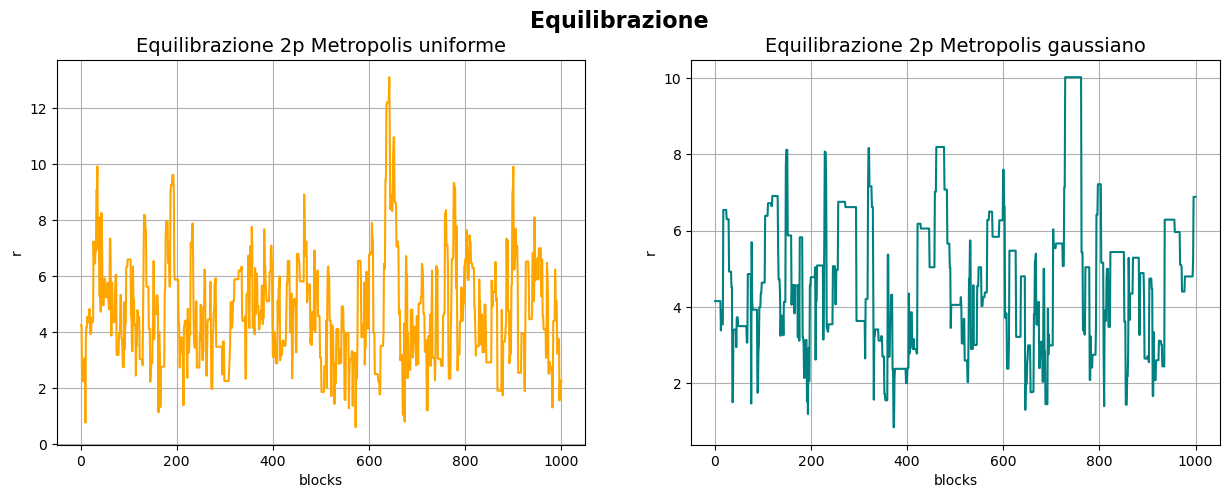

In [22]:
import matplotlib.pyplot as plt
import numpy as np


x, y = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es05/eq2.txt", unpack=True)

z, w = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es05/eq2G.txt", unpack=True)


plt.figure(figsize=(15,5))
plt.suptitle('Equilibrazione',fontweight='bold',fontsize=16)

plt.subplot(121)
plt.plot(x,y, color = "orange")
plt.title('Equilibrazione 2p Metropolis uniforme',fontsize=14)
plt.xlabel('blocks')
plt.ylabel('r')
plt.grid(True)

plt.subplot(122)
plt.plot(z,w, color = "teal")
plt.title('Equilibrazione 2p Metropolis gaussiano',fontsize=14)
plt.xlabel('blocks')
plt.ylabel('r')
plt.grid(True)

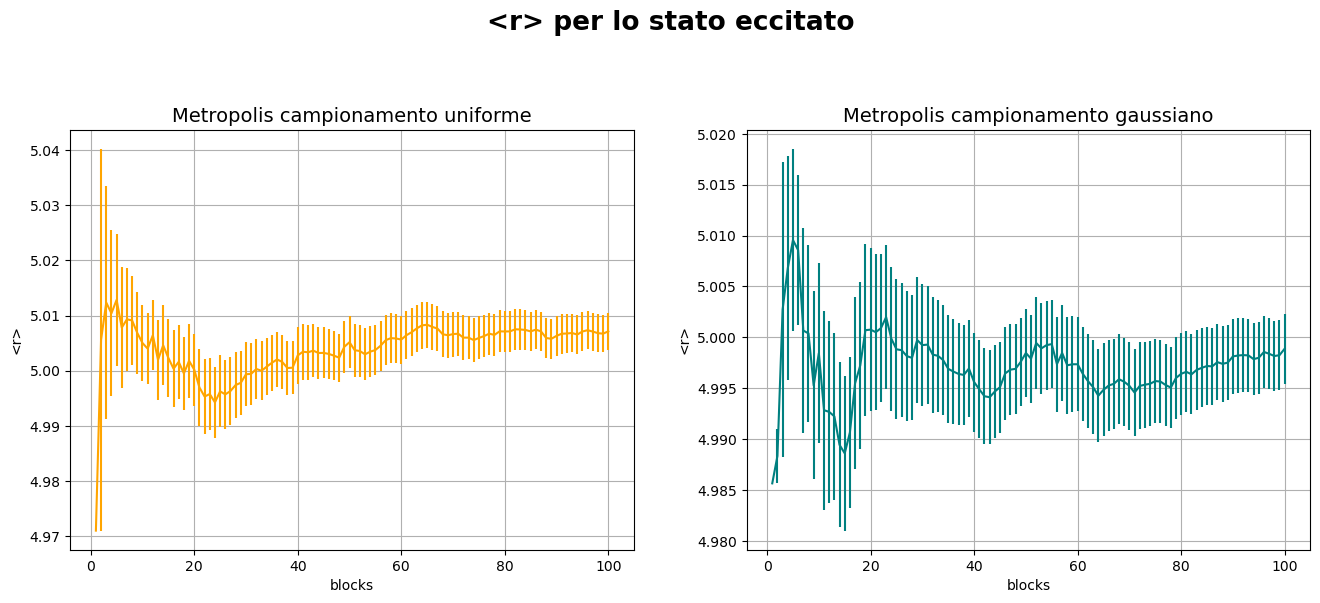

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# dati del primo grafico
x2, y2, err2 = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es05/r2.txt", unpack=True)

# dati del secondo grafico
x2G, y2G, err2G = np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es05/r2G.txt", unpack=True)


#plotting
plt.figure(figsize=(16,12))
plt.suptitle('<r> per lo stato eccitato',fontweight='bold',fontsize=19)

plt.subplot(221)
plt.errorbar(x2,y2,err2,label='ground state', color='orange')
plt.title('Metropolis campionamento uniforme',fontsize=14)
plt.xlabel('blocks')
plt.ylabel('<r>')
plt.grid(True)
#plt.legend()

plt.subplot(222)
plt.errorbar(x2G,y2G,err2G,label='ground state',color='teal')
plt.title('Metropolis campionamento gaussiano',fontsize=14)
plt.xlabel('blocks')
plt.ylabel('<r>')
plt.grid(True)
#plt.legend()


# visualizzazione dei due subplot
plt.show()

Anche per lo stato eccitato le due probabilità di transizione forniscono risultati analoghi e compatibili tra di loro e con il valore atteso dalla teoria.
\
Riporto qui sotto anche il grafico 3D delle posizioni campionate con l'algoritmo di Metropolis.

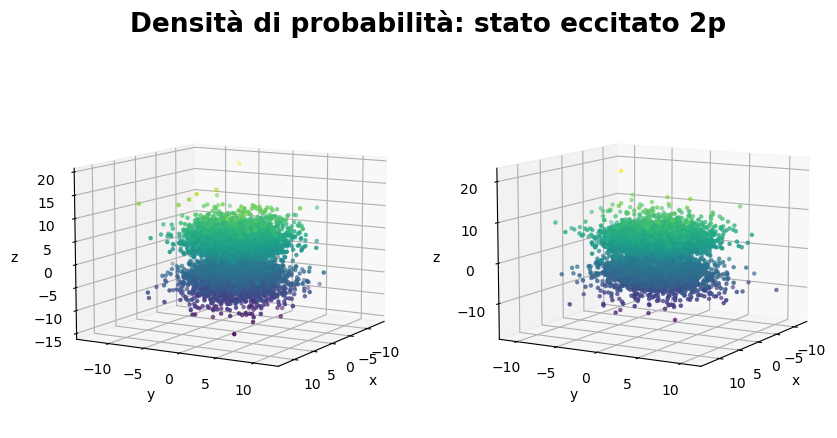

In [12]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


X2, Y2, Z2=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es05/psi2.txt", unpack=True)
X2G, Y2G, Z2G=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es05/psi2G.txt", unpack=True)


fig = plt.figure(figsize=(10,5))
plt.suptitle('Densità di probabilità: stato eccitato 2p',fontweight='bold',fontsize=19)

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X2, Y2, Z2, c=Z2, marker='.')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(10, 30)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X2G, Y2G, Z2G, c=Z2G, marker='.')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.view_init(10, 30)

plt.show()